# Regression with an Abalone Dataset
Run after following notebooks are run:
1. **01 Data Cleaning**

## Development Notes/Ideas

## Libraries

In [1]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # Used for Cramer's V computation

## Load Data

In [2]:
train = pd.read_pickle('train_clean.pkl')

## Univariate Analysis
First, we look at the distribution of the target variable: Rings
- Normal distribution, right skewed
- No Rings=28 observation in the train data  - since train and test data are both synthesised data, it's unlikely test data will have Rings=28 as well

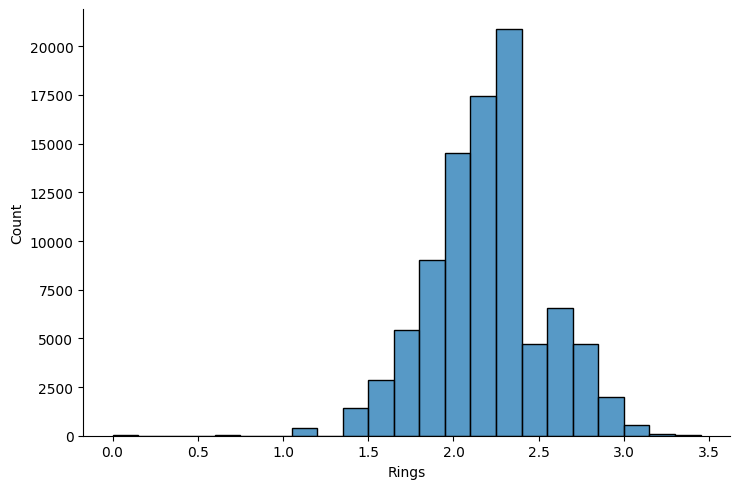

In [3]:
## histogram of Rings
g=sns.displot(data=train, x='Rings', binwidth=0.15, aspect=1.5)

In [4]:
## actual observation count for each ring value
train.value_counts('Rings', sort=False)

Rings
0.000000       25
0.693147       29
1.098612      386
1.386294     1402
1.609438     2862
1.791759     5411
1.945910     9008
2.079442    14499
2.197225    17465
2.302585    12464
2.397895     8407
2.484907     4719
2.564949     4074
2.639057     2507
2.708050     2072
2.772589     1439
2.833213     1175
2.890372      848
2.944439      639
2.995732      507
3.044522      255
3.091042      108
3.135494      180
3.178054       29
3.218876       22
3.258097       18
3.295837       41
3.367296       24
Name: count, dtype: int64

### Categorical Variables - Univariate
Observations
- Sex: I weighted towards less rings, whereas M&F have similar distributions

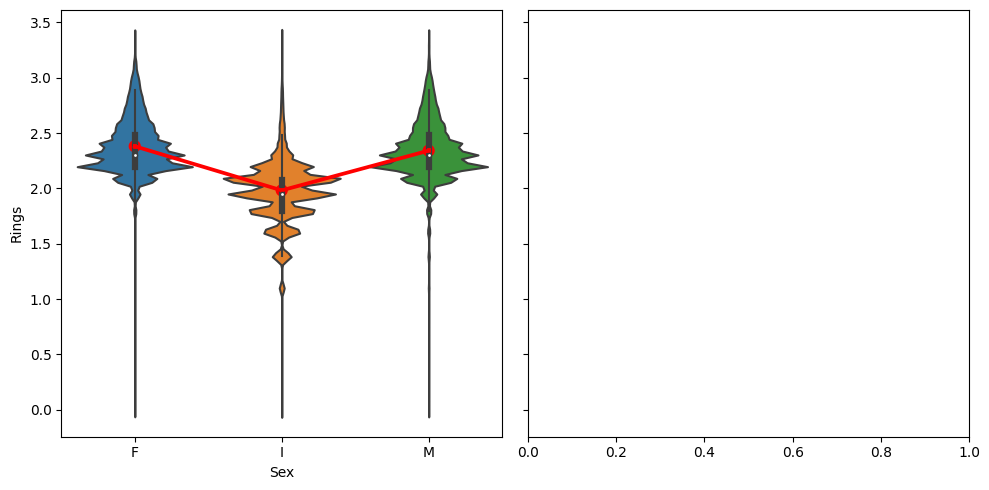

In [5]:
## list of all categorical variables
cols_cat = train.columns[train.dtypes=='category'].to_list()

## set up grid of subplots, then fill it with scatterplots of variable vs Rings
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,5), sharey=True)
for i, col in enumerate(cols_cat):
    ax = axes.ravel()[i]
    # g1=sns.stripplot(data=train, ax=ax, x=col, y='Rings', alpha=0.1, jitter=0.2)
    g2=sns.violinplot(data=train, ax=ax, x=col, y='Rings')
    g3=sns.pointplot(data=train, ax=ax, x=col, y='Rings', estimator='mean', color='red')
    ax.tick_params(rotation=0)
plt.tight_layout()

### Numerical Variables
Observations
- Height mostly under 0.4. Over 0.4 are outliers
- All variables are positively correlated with Rings
    - However appears to be an anomily at Rings 1-3, where variables are slightly negatively correlated with Rings
- Heteroscedasticity: Variance in Rings generally increases with all variable value

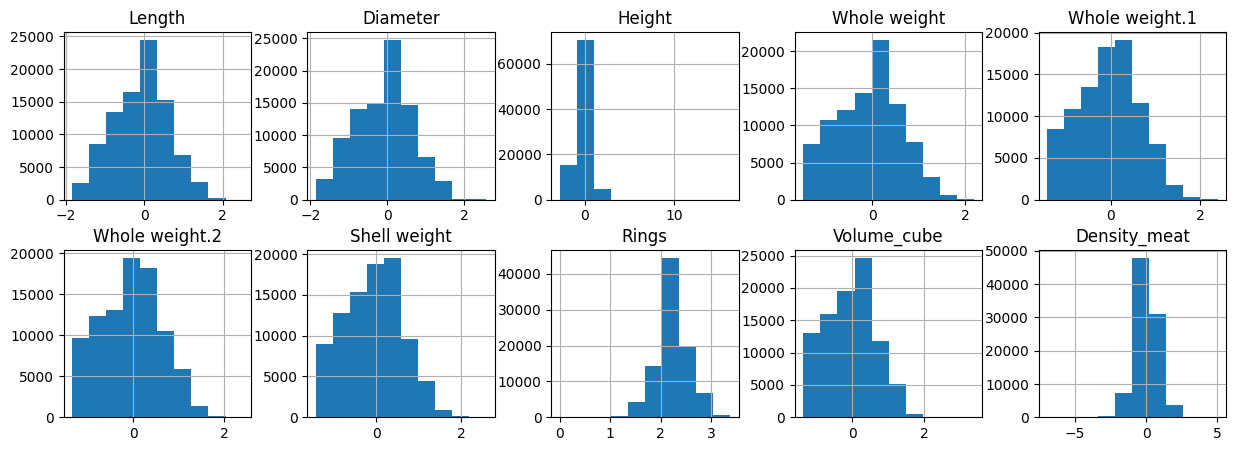

In [6]:
## histogram of all numerical variables
train.hist(figsize=(15,5), layout=(-1,5))
None

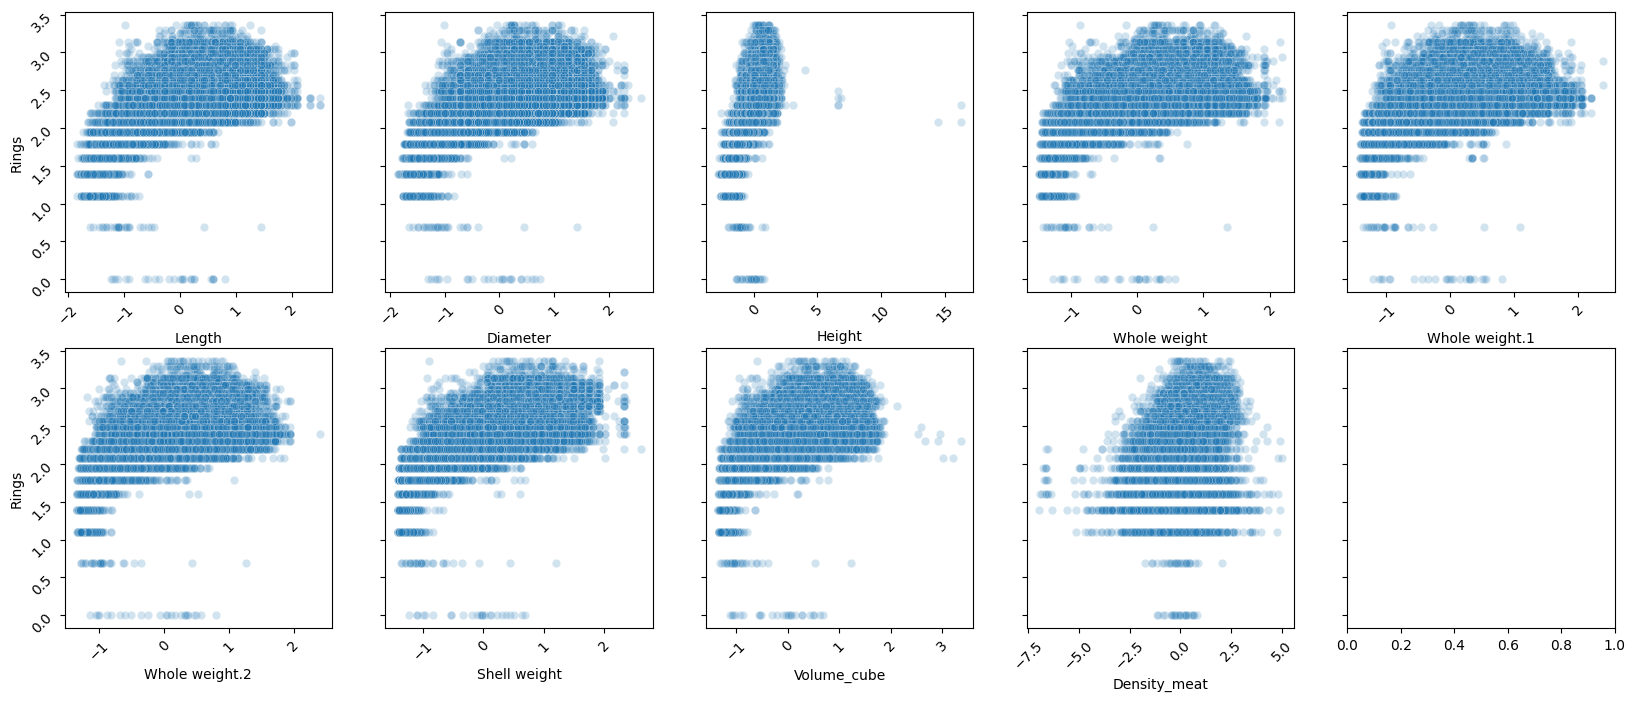

In [7]:
## list all numerical variables
cols_num = train.columns[train.dtypes!='category'].to_list()
cols_num.remove('Rings')

## set up grid of subplots, then fill with pointplots
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,8), sharey=True)
for i, col in enumerate(cols_num):
    ax = axes.ravel()[i]
    sns.scatterplot(data=train, x=col, y='Rings', ax=ax, alpha=0.2)
    ax.tick_params(labelrotation=45)

## Bivariate Analysis

### Categorical Variables

Scatterplot by gender
- M or F don't appear to stratify the data well

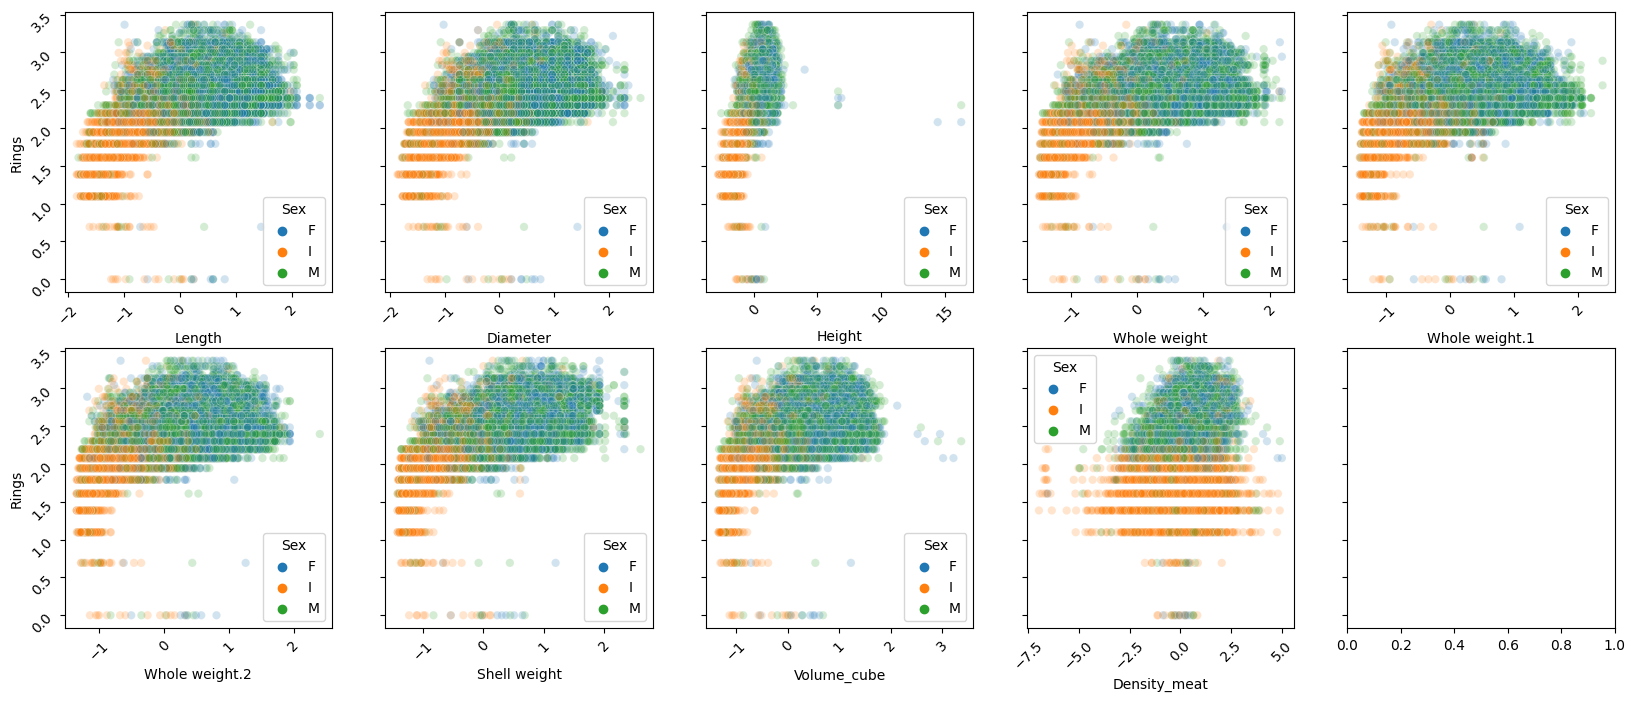

In [8]:
## list all numerical variables
cols_num = train.columns[train.dtypes!='category'].to_list()
cols_num.remove('Rings')

## set up grid of subplots, then fill with pointplots
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,8), sharey=True)
for i, col in enumerate(cols_num):
    ax = axes.ravel()[i]
    sns.scatterplot(data=train, x=col, y='Rings', ax=ax, alpha=0.2, hue='Sex')
    ax.tick_params(labelrotation=45)

<Axes: xlabel='Volume_cube', ylabel='Whole weight.1'>

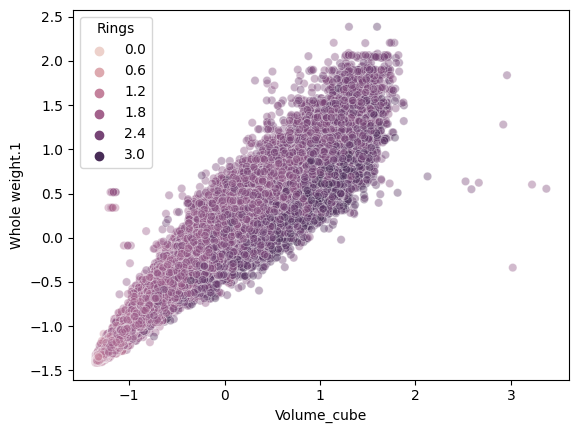

In [9]:
## check for relationship between density and rings
sns.scatterplot(data=train, x='Volume_cube', y='Whole weight.1', alpha=0.4, hue='Rings')

### Numerical Variables
Correlation Matrix
- All variables are highly correlated with each other - take care when modelling
- All variables are mostly equally correlated with Rings
- Shell weight is most correlated with Rings

<Axes: >

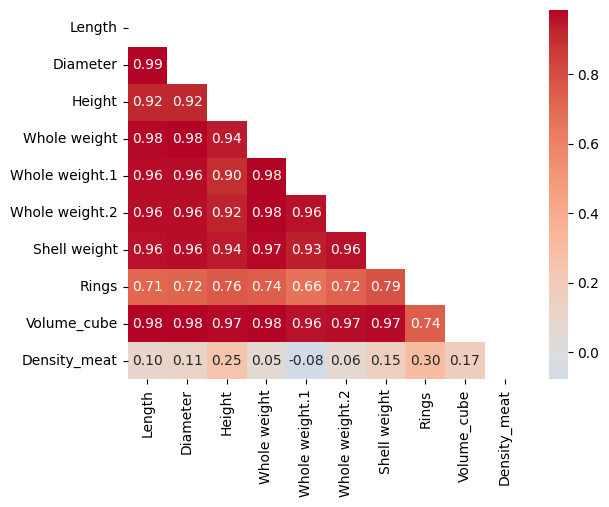

In [10]:
### create correlation matrix
cols_num = train.columns[train.dtypes!='category'].to_list()
corr_matrix = train[cols_num].corr(method='spearman')

### create heatmap of correlations
sns.heatmap(data=corr_matrix, center=0, cmap='coolwarm', mask=np.triu(np.ones_like(corr_matrix)), annot=True, annot_kws = {'size': 10}, fmt='.2f', xticklabels=True, yticklabels=True)